In [3]:
import pandas as pd
import numpy as np
data = pd.read_csv("UrbanSound8K//metadata//UrbanSound8K.csv")
data.shape

(8732, 8)

In [4]:
data.head()

slice_file_name    fsID  start        end  salience  fold  classID  \
0    100032-3-0-0.wav  100032    0.0   0.317551         1     5        3   
1  100263-2-0-117.wav  100263   58.5  62.500000         1     5        2   
2  100263-2-0-121.wav  100263   60.5  64.500000         1     5        2   
3  100263-2-0-126.wav  100263   63.0  67.000000         1     5        2   
4  100263-2-0-137.wav  100263   68.5  72.500000         1     5        2   

              class  
0          dog_bark  
1  children_playing  
2  children_playing  
3  children_playing  
4  children_playing

In [5]:
appended = []
for i in range(1,11):
    appended.append(data[data.fold == i]['class'].value_counts())
    
class_distribution = pd.DataFrame(appended)
class_distribution = class_distribution.reset_index()
class_distribution['index'] = ["fold"+str(x) for x in range(1,11)]
class_distribution

index  jackhammer  drilling  air_conditioner  street_music  \
0   fold1         120       100              100           100   
1   fold2         120       100              100           100   
2   fold3         120       100              100           100   
3   fold4         120       100              100           100   
4   fold5         120       100              100           100   
5   fold6          68       100              100           100   
6   fold7          76       100              100           100   
7   fold8          78       100              100           100   
8   fold9          82       100              100           100   
9  fold10          96       100              100           100   

   children_playing  dog_bark  engine_idling  siren  car_horn  gun_shot  
0               100       100             96     86        36        35  
1               100       100            100     91        42        35  
2               100       100            107    119        43        36  
3               100       100            107    166        59        38  
4               100       100            107     71        98        40  
5               100       100            107     74        28        46  
6               100       100            106     77        28        51  
7               100       100             88     80        30        30  
8               100       100             89     82        32        31  
9               100       100             93     83        33        32

In [6]:
data['class'].value_counts(normalize=True)

jackhammer          0.114521
street_music        0.114521
engine_idling       0.114521
dog_bark            0.114521
drilling            0.114521
air_conditioner     0.114521
children_playing    0.114521
siren               0.106390
car_horn            0.049130
gun_shot            0.042831
Name: class, dtype: float64

In [8]:

import os
import struct
from scipy.io import wavfile as wav
import matplotlib.pyplot as plt
import IPython.display as ipd

def path_class(filename):
    excerpt = data[data['slice_file_name'] == filename]
    path_name = os.path.join('UrbanSound8K/audio', 'fold'+str(excerpt.fold.values[0]), filename)
    return path_name, excerpt['class'].values[0]

def wav_plotter(full_path, class_label):   
    rate, wav_sample = wav.read(full_path)
    wave_file = open(full_path,"rb")
    riff_fmt = wave_file.read(36)
    bit_depth_string = riff_fmt[-2:]
    bit_depth = struct.unpack("H",bit_depth_string)[0]
    print('sampling rate: ',rate,'Hz')
    print('bit depth: ',bit_depth)
    print('number of channels: ',wav_sample.shape[1])
    print('duration: ',wav_sample.shape[0]/rate,' second')
    print('number of samples: ',len(wav_sample))
    print('class: ',class_label)
    plt.figure(figsize=(12, 4))
    plt.plot(wav_sample) 
    return ipd.Audio(full_path)

sampling rate:  44100 Hz
bit depth:  16
number of channels:  2
duration:  4.0  second
number of samples:  176400
class:  children_playing


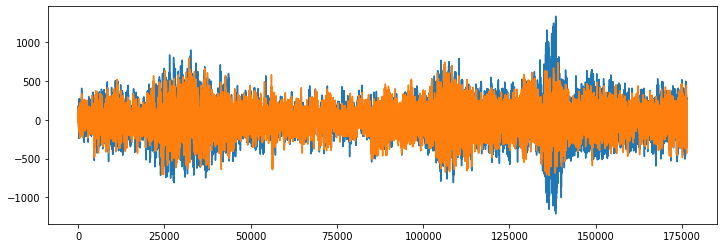

In [9]:
fullpath, label = path_class('100263-2-0-117.wav')
wav_plotter(fullpath,label)